In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bài 1:
Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:

Lr = 0.2

Lr = 2

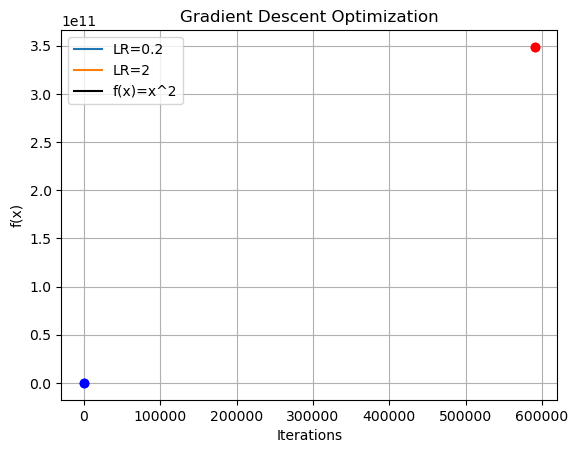

In [2]:
def f(x):
    return x**2

def df(x):
    return 2*x

def gradient_descent(learning_rate, num_iterations):
    x = 10  # Giá trị ban đầu của x
    trajectory = [x]
    
    for _ in range(num_iterations):
        x = x - learning_rate * df(x)
        trajectory.append(x)
        
    return trajectory

# Cài đặt các tham số
num_iterations = 10
learning_rates = [0.2, 2]

# Tính toán và vẽ đồ thị
for lr in learning_rates:
    trajectory = gradient_descent(lr, num_iterations)
    plt.plot(trajectory, label=f'LR={lr}')

# Vẽ đồ thị hàm f(x) = x^2
x_values = range(-12, 14)
y_values = [f(x) for x in x_values]
plt.plot(x_values, y_values, label='f(x)=x^2', color='black')

# Đánh dấu điểm đầu và cuối của mỗi đường đi
for lr, traj in zip(learning_rates, [trajectory, trajectory]):
    plt.scatter(traj[0], f(traj[0]), color='blue', zorder=5)
    plt.scatter(traj[-1], f(traj[-1]), color='red', zorder=5)

# Thiết lập các thuộc tính đồ thị
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()

# Bài 2:
Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) \
Dựa vào code mẫu hãy

- Implement thuật toán linear regression với dữ liệu trên
- Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, 
và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test

In [6]:
# Dữ liệu
data = pd.read_csv("data_linear.csv").values

In [8]:
# split train và test theo tỉ lệ 80/20
np.random.shuffle(data)
train_size = int(data.shape[0] * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Lấy giá trị x (diện tích) và y (giá nhà) từ tập train
x_train = train_data[:, 0].reshape(-1, 1)
y_train = train_data[:, 1].reshape(-1, 1)

# Lấy giá trị x (diện tích) và y (giá nhà) từ tập test
x_test = test_data[:, 0].reshape(-1, 1)
y_test = test_data[:, 1].reshape(-1, 1)

# Khởi tạo tham số w (trọng số) và b (độ lệch) ngẫu nhiên
w = np.random.rand(1, 1)
b = np.random.rand(1, 1)

In [9]:
# Định nghĩa hàm mất mát (loss function) là trung bình bình phương sai số (mean squared error)
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Định nghĩa hàm dự đoán (prediction function) là hàm tuyến tính y = wx + b
def prediction_function(x):
    return w * x + b

# Định nghĩa hàm cập nhật tham số (update function) theo thuật toán gradient descent
def update_function(x, y, learning_rate):
    global w, b
    # Tính đạo hàm riêng của hàm mất mát theo w và b
    dw = np.mean((prediction_function(x) - y) * x)
    db = np.mean(prediction_function(x) - y)
    # Cập nhật w và b theo công thức w = w - learning_rate * dw, b = b - learning_rate * db
    w = w - learning_rate * dw
    b = b - learning_rate * db

In [10]:
# Định nghĩa số lần lặp (epochs)
epochs = 100

# Chọn ba giá trị learning rate khác nhau: lớn, vừa và nhỏ
learning_rates = [0.01, 0.001, 0.0001]

# Tạo một biến để lưu trữ các giá trị loss cho mỗi learning rate
losses = {}

# Vòng lặp cho mỗi learning rate
for learning_rate in learning_rates:
    # Khởi tạo lại w và b ngẫu nhiên
    w = np.random.rand(1, 1)
    b = np.random.rand(1, 1)
    # Tạo một danh sách để lưu trữ các giá trị loss cho mỗi epoch
    loss_list = []
    # Vòng lặp cho mỗi epoch
    for epoch in range(epochs):
        # Tính giá trị dự đoán cho tập train
        y_pred_train = prediction_function(x_train)
        # Tính giá trị loss cho tập train
        loss_train = loss_function(y_train, y_pred_train)
        # Thêm giá trị loss vào danh sách
        loss_list.append(loss_train)
        # Cập nhật tham số w và b
        update_function(x_train, y_train, learning_rate)
        # In ra giá trị loss sau mỗi epoch
        print(f'Epoch {epoch+1}, Learning rate {learning_rate}, Loss {loss_train}')
    # Thêm danh sách loss vào biến losses với key là learning rate
    losses[learning_rate] = loss_list

Epoch 1, Learning rate 0.01, Loss 1005731.1811729227
Epoch 2, Learning rate 0.01, Loss 2142513649.2672431
Epoch 3, Learning rate 0.01, Loss 4565145284481.446
Epoch 4, Learning rate 0.01, Loss 9727150857320806.0
Epoch 5, Learning rate 0.01, Loss 2.0726057531400385e+19
Epoch 6, Learning rate 0.01, Loss 4.416189972746509e+22
Epoch 7, Learning rate 0.01, Loss 9.409765386320957e+25
Epoch 8, Learning rate 0.01, Loss 2.004979069560657e+29
Epoch 9, Learning rate 0.01, Loss 4.272094897520118e+32
Epoch 10, Learning rate 0.01, Loss 9.102735829265613e+35
Epoch 11, Learning rate 0.01, Loss 1.939558964982138e+39
Epoch 12, Learning rate 0.01, Loss 4.132701474811539e+42
Epoch 13, Learning rate 0.01, Loss 8.805724284884914e+45
Epoch 14, Learning rate 0.01, Loss 1.8762734413316896e+49
Epoch 15, Learning rate 0.01, Loss 3.997856295239058e+52
Epoch 16, Learning rate 0.01, Loss 8.518403877229486e+55
Epoch 17, Learning rate 0.01, Loss 1.8150528497487997e+59
Epoch 18, Learning rate 0.01, Loss 3.8674109549883

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6412\3704373303.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred)**2)


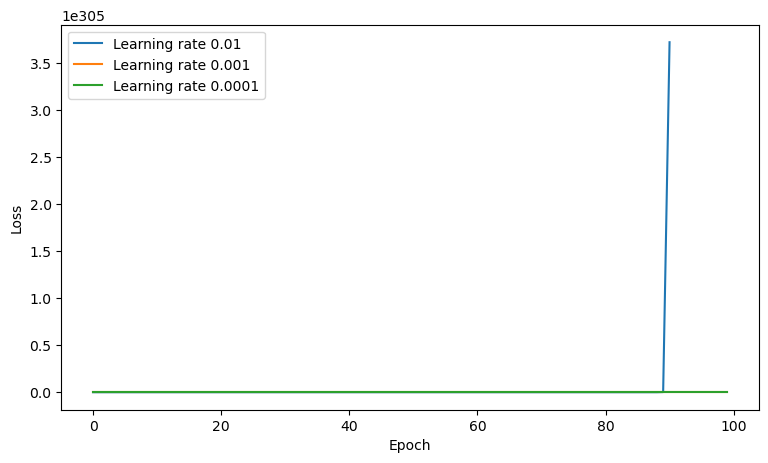

In [13]:
# Vẽ đồ thị loss cho mỗi learning rate
plt.figure(figsize=(9,5))
for learning_rate in learning_rates:
    plt.plot(losses[learning_rate], label=f'Learning rate {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Tính giá trị dự đoán cho tập test
y_pred_test = prediction_function(x_test)

# Tính các chỉ số MSE, RMSE, MAE, MAPE trên tập test
mse = loss_function(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# In ra các chỉ số
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


MSE: 495.6810689247308
RMSE: 22.263896085921953
MAE: 17.559345706158126
MAPE: 1.718763342698643%
